In [6]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [7]:
## load the dataset
df = pd.read_csv('Car_Data.csv')
df

,name,year,km_driven,mileage,engine,max_power,selling_price
0,Maruti Swift Dzire VDI,2014,145500,23.40,1248,74.00,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,21.14,1498,103.52,370000
2,Honda City 2017-2020 EXi,2006,140000,17.70,1497,78.00,158000
3,Hyundai i20 Sportz Diesel,2010,127000,23.00,1396,90.00,225000
4,Maruti Swift VXI BSIII,2007,120000,16.10,1298,88.20,130000
...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,110000,18.50,1197,82.85,320000
7902,Hyundai Verna CRDi SX,2007,119000,16.80,1493,110.00,135000
7903,Maruti Swift Dzire ZDi,2009,120000,19.30,1248,73.90,382000
7904,Tata Indigo CR4,2013,25000,23.57,1396,70.00,290000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   mileage        7906 non-null   float64
 4   engine         7906 non-null   int64  
 5   max_power      7906 non-null   float64
 6   selling_price  7906 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 432.5+ KB


In [9]:
df = df.drop(columns=['name'])
df

,year,km_driven,mileage,engine,max_power,selling_price
0,2014,145500,23.40,1248,74.00,450000
1,2014,120000,21.14,1498,103.52,370000
2,2006,140000,17.70,1497,78.00,158000
3,2010,127000,23.00,1396,90.00,225000
4,2007,120000,16.10,1298,88.20,130000
...,...,...,...,...,...,...
7901,2013,110000,18.50,1197,82.85,320000
7902,2007,119000,16.80,1493,110.00,135000
7903,2009,120000,19.30,1248,73.90,382000
7904,2013,25000,23.57,1396,70.00,290000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   km_driven      7906 non-null   int64  
 2   mileage        7906 non-null   float64
 3   engine         7906 non-null   int64  
 4   max_power      7906 non-null   float64
 5   selling_price  7906 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 370.7 KB


In [11]:
## correlation matrix
corr_matrix = df.corr()
corr_matrix

,year,km_driven,mileage,engine,max_power,selling_price
year,1.000000,-0.428548,0.328544,0.018263,0.226598,0.412302
km_driven,-0.428548,1.000000,-0.172980,0.206031,-0.038159,-0.222158
mileage,0.328544,-0.172980,1.000000,-0.576408,-0.374621,-0.126280
engine,0.018263,0.206031,-0.576408,1.000000,0.703974,0.455682
max_power,0.226598,-0.038159,-0.374621,0.703974,1.000000,0.749674
selling_price,0.412302,-0.222158,-0.126280,0.455682,0.749674,1.000000


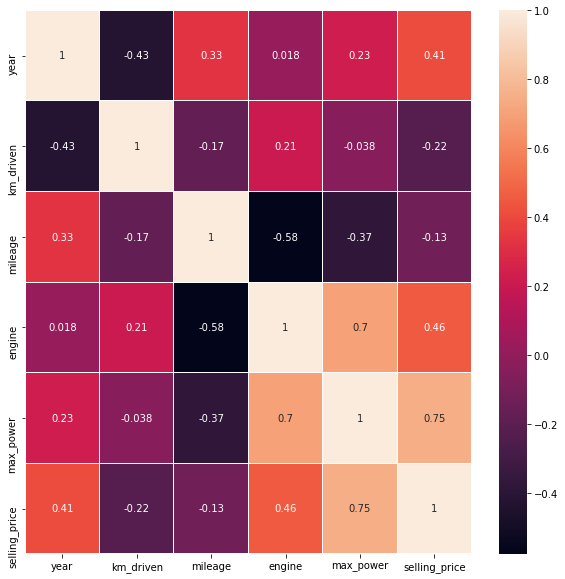

In [12]:
## heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,annot=True, linewidths=0.1)

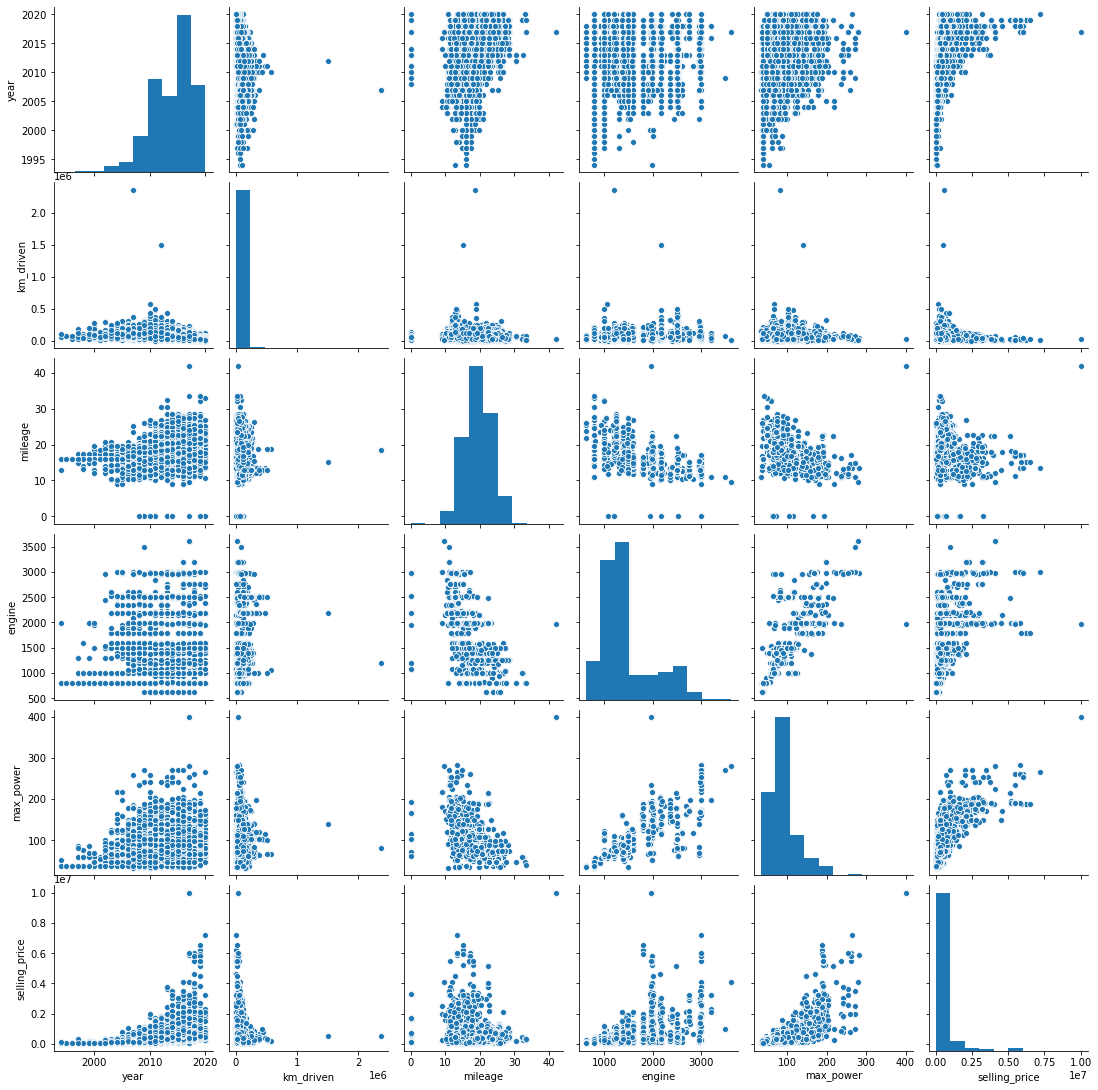

In [13]:
sns.pairplot(df)

In [14]:
# split the data into independent and dependent variable    ##classsification
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:5].values  ##  same as X = df.iloc[:, 0:3002].values
y = df.iloc[:, -1].values


In [15]:
## split the data into trainig and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 32)

In [16]:
## LINEAR REGESSION
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [17]:
pred_lin = lin_reg.predict(X_test)

In [18]:
## dataframe for predictions
pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_lin})

,Actual,Predicted
0,1220000,1.332593e+06
1,700000,6.878656e+05
2,220000,3.576040e+05
3,525000,3.721693e+05
4,165000,5.929235e+04
...,...,...
1577,500000,7.388188e+05
1578,400000,4.097022e+05
1579,650000,1.605737e+06
1580,240000,2.695413e+05


In [19]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 285883.71155686304
MSE: 231100266608.40247
RMSE: 480728.89096496213
R2: 0.6277100856351766


In [20]:
## train the LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
## make the prediction
pred_LR = model_LR.predict(X_test) 
pd.DataFrame({'Actual': y_test, 'Prediction': pred_LR})

,Actual,Prediction
0,1220000,650000
1,700000,650000
2,220000,650000
3,525000,300000
4,165000,300000
...,...,...
1577,500000,600000
1578,400000,300000
1579,650000,600000
1580,240000,550000


In [22]:
## evaluate the model accuracy
accuracy_LR =accuracy_score(y_test, pred_LR)
accuracy_LR

0.028445006321112517

In [23]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_LR))
print('MSE:', metrics.mean_squared_error(y_test, pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_LR)))
print('R2:', metrics.r2_score(y_test, pred_LR))

MAE: 341842.31226295826
MSE: 585024268042.7534
RMSE: 764868.7913902315
R2: 0.05755783908272927


In [24]:
# NAIVE BAYES
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [25]:
#predit the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_NB})

,Actual,Prediction
0,1220000,1220000
1,700000,740000
2,220000,350000
3,525000,225000
4,165000,276000
...,...,...
1577,500000,574000
1578,400000,388000
1579,650000,1500000
1580,240000,200000


In [26]:
## evaluate the model accuracy
accuracy_NB = accuracy_score(y_test,y_pred_NB)
## confusion metrics
conf_mat_NB = confusion_matrix(y_test,y_pred_NB)
print(accuracy_NB)
print(conf_mat_NB)

0.07332490518331226
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 1]]


In [27]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_NB))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_NB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_NB)))
print('R2:', metrics.r2_score(y_test, y_pred_NB))

MAE: 157010.7793931732
MSE: 80436459954.20164
RMSE: 283613.2224600991
R2: 0.8704212538235536


In [28]:
## LASSO - RIDGE REGRESSION
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [29]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': y_test,'Predicted': pred_lasso})

,Actual,Predicted
0,1220000,1.332594e+06
1,700000,6.878656e+05
2,220000,3.576041e+05
3,525000,3.721692e+05
4,165000,5.929278e+04
...,...,...
1577,500000,7.388186e+05
1578,400000,4.097023e+05
1579,650000,1.605737e+06
1580,240000,2.695416e+05


In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 285883.67473247007
MSE: 231100253101.45856
RMSE: 480728.8769165615
R2: 0.6277101073941259


In [31]:
## RANDOM FOREST REGRESSION
rf_reg = RandomForestRegressor(n_estimators=100 ,random_state=32)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=32)

In [32]:
pred_rf = rf_reg.predict(X_test)
pd.DataFrame({'Actual': y_test,'Predicted': pred_rf})

,Actual,Predicted
0,1220000,1.222850e+06
1,700000,6.622217e+05
2,220000,3.189799e+05
3,525000,3.950180e+05
4,165000,2.423299e+05
...,...,...
1577,500000,4.962126e+05
1578,400000,4.214100e+05
1579,650000,8.089500e+05
1580,240000,2.249832e+05


In [33]:
## evaluate the model accuracy
accuracy_NB = accuracy_score(y_test,y_pred_NB)
## confusion metrics
conf_mat_NB = confusion_matrix(y_test,y_pred_NB)
print(accuracy_NB)
print(conf_mat_NB)

0.07332490518331226
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 1]]


In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print('R2:', metrics.r2_score(y_test, pred_rf))

MAE: 62724.247120792585
MSE: 14525246551.943829
RMSE: 120520.73079741854
R2: 0.9766006206989183


In [35]:
## POLYNOMIAL REGRESSION
poly_reg = PolynomialFeatures(degree=2)
x_train_2 = poly_reg.fit_transform(X_train)
x_test_2 = poly_reg.transform(X_test)
mul_reg = LinearRegression()
mul_reg.fit(x_train_2,y_train)

LinearRegression()

In [36]:
mul_pred = mul_reg.predict(x_test_2)
pd.DataFrame({'Actual': y_test, 'Prediction': mul_pred})

,Actual,Prediction
0,1220000,1.439810e+06
1,700000,5.784358e+05
2,220000,2.794543e+05
3,525000,3.129923e+05
4,165000,1.059164e+05
...,...,...
1577,500000,6.571246e+05
1578,400000,3.130200e+05
1579,650000,1.549631e+06
1580,240000,1.685416e+05


In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, mul_pred)))
print('R2:', metrics.r2_score(y_test, mul_pred))

MAE: 168901.34949145396
MSE: 91800449951.29266
RMSE: 302985.89068023063
R2: 0.8521144862678561


In [38]:
## RIDGE REGRESSION
model_rigre = Ridge(alpha=0.99, random_state = 32)
model_rigre.fit(X_train, y_train)

Ridge(alpha=0.99, random_state=32)

In [39]:
## prediction
pred_ridge = model_rigre.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Prediction': pred_ridge})

,Actual,Prediction
0,1220000,1.332592e+06
1,700000,6.878640e+05
2,220000,3.576045e+05
3,525000,3.721697e+05
4,165000,5.929476e+04
...,...,...
1577,500000,7.388171e+05
1578,400000,4.097010e+05
1579,650000,1.605737e+06
1580,240000,2.695423e+05


In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 285883.4193761643
MSE: 231100198850.8211
RMSE: 480728.82049115916
R2: 0.6277101947889414


In [41]:
## K-Nearest Neighbors
Knn_model = KNeighborsClassifier(n_neighbors=3)
##train my model
Knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [42]:
## Make prediction
y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,1220000,645000
1,700000,450000
2,220000,300000
3,525000,285000
4,165000,300000
...,...,...
1577,500000,450000
1578,400000,270000
1579,650000,800000
1580,240000,325000


In [43]:
## Evaluate the naive bayes model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.1447534766118837
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [44]:
## Decision tree classifier
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 80, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 80, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)

In [45]:
## trainiong my models
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)
Decision_tree_max_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [47]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
0,1220000,600000
1,700000,600000
2,220000,300000
3,525000,600000
4,165000,120000
...,...,...
1577,500000,600000
1578,400000,300000
1579,650000,600000
1580,240000,250000


In [48]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
0,1220000,850000
1,700000,600000
2,220000,300000
3,525000,350000
4,165000,120000
...,...,...
1577,500000,600000
1578,400000,300000
1579,650000,2000000
1580,240000,350000


In [49]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
0,1220000,600000
1,700000,600000
2,220000,300000
3,525000,600000
4,165000,120000
...,...,...
1577,500000,600000
1578,400000,300000
1579,650000,2000000
1580,240000,200000


In [50]:
## model evaluation
## Evaluate the gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)




print(accuracy_gini)
print(conf_mat_gini)

0.056890012642225034
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
## Evaluate the entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)


print(accuracy_entropy)
print(conf_mat_entropy)

0.05941845764854614
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
## Evaluate the max_depth
accuracy_max_depth = accuracy_score(y_test, y_pred_depth3)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth3)


print(accuracy_max_depth)
print(conf_mat_max_depth)

0.09039190897597978
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 1 0 0]]
